<a href="https://colab.research.google.com/github/karthikstar/DCF-Analysis/blob/main/DCF_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investment Thesis

Apple is one of the world’s largest and most profitable companies, with consistent free cash flow generation.

Despite strong fundamentals, a conservative DCF approach suggests the stock may be priced above its intrinsic value.

Key driver: slowing free cash flow growth compared to its past performance.

# Discount Cash Flow Model for Intrinsic Value

A Discounted Cash Flow (DCF) model is a valuation method used to estimate the intrinsic value of a stock or an investment based on its expected future cash flows. DCF attempts to figure out the value of an investment today, based on projections of how much money it will generate in the future. (Investopedia)

---

## Why Use Discount Cash Flow Model?

- **Free Cash Flow is King**: stocks and business valuation emphasize the critical importance of a company's ability to generate cash. DCF estimates future cash flow to value today's stock price.  
- **Time Value of Money**: Money in the future is worth less than money today. So, we need to *discount* future cash flows to find out what they're worth right now.

---

## Steps of the Discount Cash Flow Model

1. **Estimate Future Cash Flows**  
   *"First, we predict how much cash the company will generate in the future, usually for the next 5–10 years."*

2. **Determine a Discount Rate**  
   *"Then, we choose a 'discount rate.' This is like an interest rate that represents the risk of investing in the company and the time value of money."*

3. **Calculate Present Value**  
   *"We use this discount rate to calculate what those future cash flows are worth today. This is called the 'present value.' "*

4. **Terminal Value**  
   *"We also estimate a 'terminal value' — what the company might be worth after our specific forecast period."*

5. **Sum It Up**  
   *"We add up all these present values to get the estimated value of the company."*

6. **Per Share Value**  
   *"Finally, we divide this by the number of shares to get a per-share value."*


In [ ]:
#import pandas as pd
import datetime
import time
import numpy as np

In [ ]:
!pip install yahooquery

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.7 MB/s eta 0:00:00


In [ ]:
from yahooquery import Ticker #to get data from financial statements

In [ ]:
#to enable all rows to be seen
pd.set_option('display.max_rows', None)

In [ ]:
symbol = 'AAPL'
stock = Ticker(symbol)

# Get Historic FCF
- Create a simple forecast of future FCF based on previous FCF growth ratio

For model simplicity, FCF projections can be enhanced by considering the individual components of FCF, macroeconomic factors and sector growth prospects, etc

In [ ]:
df_cash = pd.DataFrame(stock.cash_flow())
df_cash['asOfDate'] = pd.to_datetime(df_cash['asOfDate']) #ensure its a DateTime column

df_cash.set_index('asOfDate', inplace = True) #set as index, since its a time series data

cash_period = df_cash['periodType'].iloc[0]


df_cash = df_cash.iloc[:, 2:] #provide everything from index 2 and beyond
df_cash['FreeCashFlow']

,FreeCashFlow
asOfDate,
2020-09-30,NaN
2021-09-30,9.295300e+10
2022-09-30,1.114430e+11
2023-09-30,9.958400e+10
2024-09-30,1.088070e+11
2025-06-30,9.618400e+10


### Get historic Net Debt

In [ ]:
df_balance = pd.DataFrame(stock.balance_sheet())

df_balance['asOfDate'] = pd.to_datetime(df_balance['asOfDate'])

df_balance.set_index('asOfDate', inplace = True)

df_balance = df_balance.iloc[:, 2:]

df_balance

,AccountsPayable,AccountsReceivable,AccumulatedDepreciation,AvailableForSaleSecurities,CapitalLeaseObligations,CapitalStock,CashAndCashEquivalents,CashCashEquivalentsAndShortTermInvestments,CashEquivalents,CashFinancial,...,TotalCapitalization,TotalDebt,TotalEquityGrossMinorityInterest,TotalLiabilitiesNetMinorityInterest,TotalNonCurrentAssets,TotalNonCurrentLiabilitiesNetMinorityInterest,TotalTaxPayable,TradeandOtherPayablesNonCurrent,TreasurySharesNumber,WorkingCapital
asOfDate,,,,,,,,,,,,,,,,,,,,,
2020-09-30,NaN,NaN,NaN,NaN,9.842000e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-30,5.476300e+10,2.627800e+10,-7.028300e+10,1.278770e+11,1.180300e+10,5.736500e+10,3.494000e+10,6.263900e+10,1.763500e+10,1.730500e+10,...,1.721960e+11,1.365220e+11,6.309000e+10,2.879120e+11,2.161660e+11,1.624310e+11,NaN,2.468900e+10,NaN,9.355000e+09
2022-09-30,6.411500e+10,2.818400e+10,-7.234000e+10,1.208050e+11,1.241100e+10,6.484900e+10,2.364600e+10,4.830400e+10,5.100000e+09,1.854600e+10,...,1.496310e+11,1.324800e+11,5.067200e+10,3.020830e+11,2.173500e+11,1.481010e+11,6.552000e+09,1.665700e+10,NaN,-1.857700e+10
2023-09-30,6.261100e+10,2.950800e+10,-7.088400e+10,1.005440e+11,1.284200e+10,7.381200e+10,2.996500e+10,6.155500e+10,1.606000e+09,2.835900e+10,...,1.574270e+11,1.110880e+11,6.214600e+10,2.904370e+11,2.090170e+11,1.451290e+11,8.819000e+09,1.545700e+10,0.0,-1.742000e+09
2024-09-30,6.896000e+10,3.341000e+10,-7.344800e+10,9.147900e+10,NaN,8.327600e+10,2.994300e+10,6.517100e+10,2.744000e+09,2.719900e+10,...,1.427000e+11,1.066290e+11,5.695000e+10,3.080300e+11,2.119930e+11,1.316380e+11,2.660100e+10,9.254000e+09,NaN,-2.340500e+10


In [ ]:
net_debt = df_balance['NetDebt'].iloc[-1] #take last row
net_debt

np.float64(76686000000.0)

### Create a Convert to List Function for Future Wrangling

In [ ]:
def column_to_list(df, column_name):
    data_list = df[column_name].tolist()
    data_list = [x for x in data_list if pd.notnull(x)]
    return data_list

In [ ]:
historic_fcf = column_to_list(df_cash, 'FreeCashFlow')
historic_fcf

[92953000000.0, 111443000000.0, 99584000000.0, 108807000000.0, 96184000000.0]

### Calculate Average Growth Rate of FCF for Simple Forecasting

In [ ]:
fcf_avg_growth_rate = np.mean([(historic_fcf[i] - historic_fcf[i-1]) / historic_fcf[i-1] for i in range(1, len(historic_fcf))])

fcf_avg_growth_rate #Average growth rate for AAPL is about 1.72%

np.float64(0.017276777927319735)

### Future projections (next 5 years)

- This is a simple forecast that uses the average growth rate. A more sophisticated model with more historic data and complex forecasting may be needed to improve the model.

In [ ]:
#using the average growth rate calculated, we can project for the upcoming years how its free cash flows will be

future_year = 5
future_fcf = [historic_fcf[-1] * (1 + fcf_avg_growth_rate) ** (i+1) for i in range(future_year)]
future_fcf

[np.float64(97845749608.16132),
 np.float64(99536208895.27367),
 np.float64(101255873872.08461),
 np.float64(103005249118.80931),
 np.float64(104784847933.18323)]

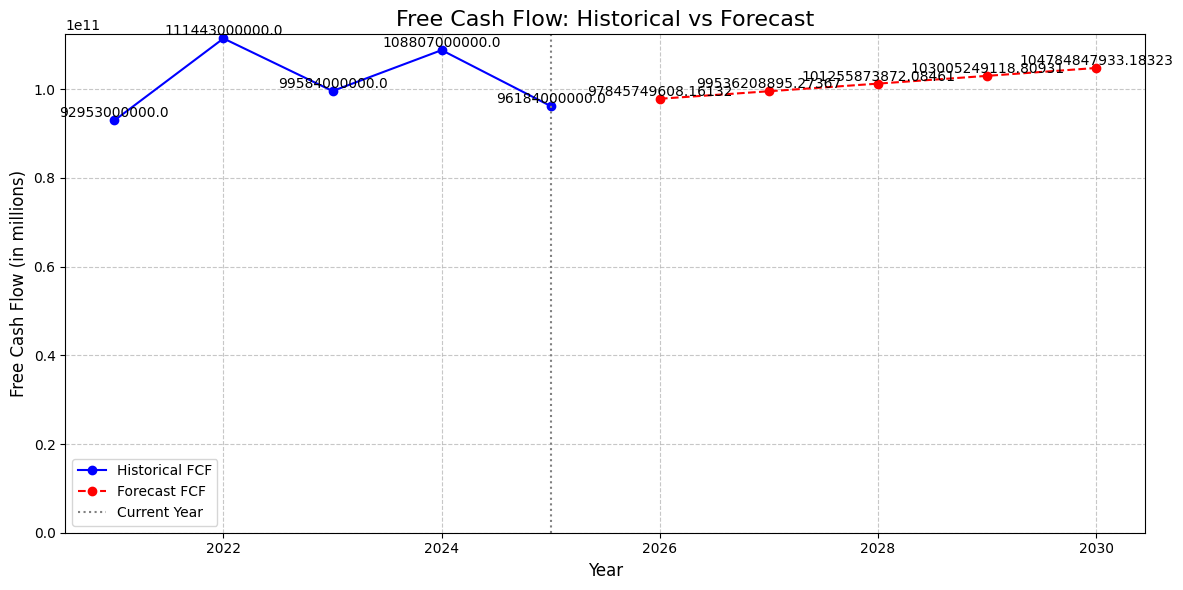

In [ ]:
import matplotlib.pyplot as plt


historical_years = [2021, 2022, 2023, 2024, 2025]

forecast_years = [2026, 2027, 2028, 2029, 2030]

#combine data for plotting
all_years = historical_years + forecast_years
all_fcf = historic_fcf + future_fcf

#Create the plot
plt.figure(figsize = (12,6))

#Plot historical data
plt.plot(historical_years, historic_fcf, marker = 'o', linestyle = '-', color = 'blue', label = 'Historical FCF')

#Plot forecast data
plt.plot(forecast_years, future_fcf, marker = 'o', linestyle = '--', color = 'red', label = 'Forecast FCF')

#Add a vertical line to seperate historical and forecast data
plt.axvline(x=historical_years[-1], color = 'gray' , linestyle=":", label= 'Current Year')

#customise the plot

plt.title('Free Cash Flow: Historical vs Forecast', fontsize = 16)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Free Cash Flow (in millions)', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

#Adjust y-axis to start from 0
plt.ylim(bottom = 0)

#add data labels
for i, value in enumerate(all_fcf):
  plt.text(all_years[i], value, f'{value}', ha='center', va='bottom')

#Show the plot
plt.tight_layout()
plt.show()

### **Get Number of Outstanding shares**
Number of shares outstanding as of September 2025 : 14,902,886,000

In [ ]:
import requests

#Web Scraping - as outsanding shares value is not available on yahoo query
from bs4 import BeautifulSoup

company = 'apple'

url = f"https://companiesmarketcap.com/{company}/shares-outstanding/"
response = requests.get(url)
response

#Parse HTML
soup = BeautifulSoup(response.content, 'html.parser')

shares_outstanding_element = soup.find('span', class_ = 'background-ya')
shares_outstanding = shares_outstanding_element.text.strip() if shares_outstanding_element else "Not Found"

shares_outstanding

'14,902,886,000'

In [ ]:
def string_to_number(s):
  try:
    return int(s.replace(',', ''))
  except ValueError:
    try:
      return float(s.replace(',', ''))
    except ValueError: #if it can't be resolved to a int or float
      print(f"Error: Unable to convert {s} to a number")
      return None

shares_outstanding_num = string_to_number(shares_outstanding)
shares_outstanding_num

14902886000

### **Get WACC**

There are ways to caluclate WACC on our own using Cost of equity, tax rate, cost of debt.. but we can try to web scrape it off

In [ ]:
import requests
from bs4 import BeautifulSoup

def get_wacc(symbol: str):
    """
    Fetch the WACC (Weighted Average Cost of Capital) for a given stock symbol
    from valueinvesting.io.
    """

    # Build the URL
    url = f"https://valueinvesting.io/{symbol}/valuation/wacc"

    # Send a GET request
    response = requests.get(url)
    if response.status_code != 200:
        print(f"Failed to fetch page. Status code: {response.status_code}")
        return None

    # Parse the HTML content
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the element containing the WACC value
    # (WACC is in a <td> with class "align_right orange")
    wacc_element = soup.find('td', class_='align_right orange')

    if not wacc_element:
        print("WACC value not found on the page.")
        return None

    # Extract text and clean it
    wacc_text = wacc_element.text.strip()
    print(f"WACC for {symbol.upper()}: {wacc_text}")

    try:
        # Convert WACC to float (removing % sign if present)
        wacc_float = float(wacc_text.rstrip('%'))
        print(f"WACC as a float: {wacc_float}%")
        return wacc_float
    except ValueError:
        print("Could not convert WACC to float.")
        return None


# Example usage
if __name__ == "__main__":
    get_wacc("AAPL")


Failed to fetch page. Status code: 403


Web scriping doesn't work well with https://valueinvesting.io/AAPL/valuation/wacc. We just take the Wacc value in this website which is 9.1%.

### **Discount Free Cash Flow Function**
- Present value: (PV) is used to calculate the current value of a future sum of money or stream of cash flows, discounted at a specific rate (e.g WACC or discount rate). The formula accounts for the time value of money, which means that money today is worth more than the same amount in the future.



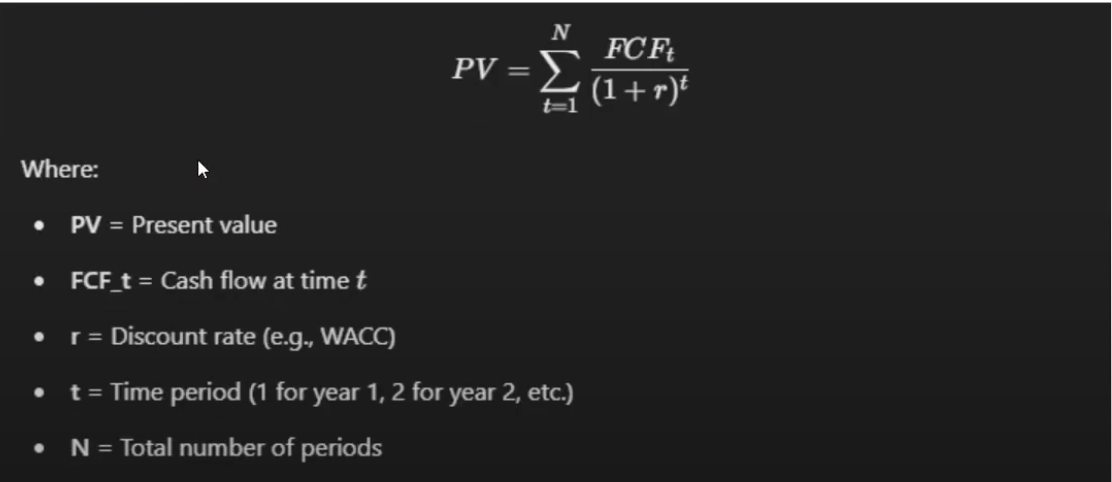

In [ ]:
#Convert the future free cash flows (estimated using the average growth model), into present value, based on wacc value

def present_value(fcf, wacc):
  return [fcf[i] / (1+wacc)**(i+1) for i in range(len(fcf))]

#Step 1: Calculate Present Value
pv = present_value(fcf = future_fcf, wacc = 0.091) #wacc value taken from https://valueinvesting.io/AAPL/valuation/wacc
pv



[np.float64(89684463435.52824),
 np.float64(83624126483.80817),
 np.float64(77973310675.00919),
 np.float64(72704343031.89662),
 np.float64(67791420550.69696)]

### DCF Function

In [ ]:
def DCF(fcf, wacc, terminal_growth_rate, net_debt, num_shares_outstanding = shares_outstanding):
  pv_fcf = present_value(fcf, wacc)

  #Step 2: Calculate the Terminal Value
  # What's TV?
  # After forecast period, its common to assume that the company will grow at a constant rate into perpetuity.
  # The TV represents the present value of all future free cash flows beyond the forecast period
  # Formula is most recent fcf * 1 + G / wacc - G. (G is long term petro growth rate)
  terminal_value = (fcf[-1] * (1+terminal_growth_rate)) / (wacc - terminal_growth_rate)

  # Step 3: Calculate PV of TV
  pv_terminal_value = terminal_value/(1+wacc)**len(fcf)

  #Step 4: Calculate Enterprise Value (EV)
  # For this, we need to sum up the forecasted fcf and the terminal value

  enterprise_value = sum(pv_fcf) + pv_terminal_value

  #Step 5: Calculate the Equity Value which is equal to Enterprise Value - Net Debt
  equity_value = enterprise_value - net_debt

  #Step 6: Calculate Intrinsic Value
  intrinsic_stock_price = equity_value / num_shares_outstanding

  return print(f"Intrinsic Stock Price: ${intrinsic_stock_price}")

In [ ]:
#terminal growth value here is 0.03 - industry standard, conservative value.
DCF(fcf = future_fcf, wacc= 0.091, terminal_growth_rate = 0.03, net_debt = net_debt, num_shares_outstanding=shares_outstanding_num)

Intrinsic Stock Price: $97.95193160552287


Our DCF analysis shows that the AAPL may be **overvalued**.

Currently, AAPL is at $230.

But based on our our discounted free cash flow model, AAPL stock should be at $97. assuming our future free cash flows we estimated are indeed true, and we performed present value and applied the appropriate wacc and terminal growth.


Limitations
- Using average growth rate as the forecast for future free cash flows is not the most sophisticated
- Doesn't consider seasonaility, probability / likelihood of free cash flows increasing at a straight line, not realistic. usually we will see some stagnation etc.

Potential Improvements
- using other APIs e.g Alphavantage that offers more historical data. Yahoo query/ Yahoo finance only provides data for recent few years.
- using a more sophisticated model instead of average growth rate to estinmate future free cash flows
- A working, automated method to retrieve WACC


# Conclusion

DCF suggests Apple trades at a significant premium to intrinsic value.

Market likely prices in continued innovation (AI, Vision Pro, services) and shareholder returns (buybacks, dividends) beyond conservative forecasts.

Investors should weigh whether Apple’s growth optionality justifies the premium.